In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\rosem\Downloads\FINAL_PROJECT_WORKS\CSV_files\featue_engg_data.csv")
df

,UTC_Time,Date,Region,Hour,Demand,Net_Generation,Total_Interchange,Forecasted_Demand,Coal_Gen,Gas_Gen,...,Season_Summer,Season_Winter,Demand_lag1,Demand_lag24,Demand_lag168,Rolling_Mean_3H,Rolling_Mean_24H,Total_Gen,Renewable_Pct,Fossil_Pct
0,2018-07-08 08:00:00,2018-07-08,CAL,1,30664.0,18659.0,-9218.0,29726.0,6.0,10566.0,...,1,0,33215.0,32597.0,26061.0,33371.000,34950.375,15326.0,16.188,68.981
1,2018-07-08 09:00:00,2018-07-08,CAL,2,28781.0,18056.0,-8915.0,27697.0,7.0,10191.0,...,1,0,30664.0,30415.0,24604.0,30886.667,34882.292,14780.0,15.629,68.999
2,2018-07-08 10:00:00,2018-07-08,CAL,3,27512.0,17258.0,-8298.0,26245.0,7.0,9494.0,...,1,0,28781.0,28749.0,23554.0,28985.667,34830.750,13753.0,14.397,69.083
3,2018-07-08 11:00:00,2018-07-08,CAL,4,26610.0,17143.0,-7994.0,25349.0,8.0,9264.0,...,1,0,27512.0,27605.0,22843.0,27634.333,34789.292,13580.0,14.971,68.277
4,2018-07-08 12:00:00,2018-07-08,CAL,5,25947.0,16779.0,-7648.0,24872.0,10.0,9272.0,...,1,0,26610.0,27026.0,22538.0,26689.667,34744.333,13729.0,15.813,67.609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525292,2023-07-01 01:00:00,2023-06-30,TEX,20,73862.0,73920.0,58.0,75075.0,11013.0,36589.0,...,1,0,76384.0,77220.0,70515.0,75998.333,65194.000,54596.0,4.308,87.190
525293,2023-07-01 02:00:00,2023-06-30,TEX,21,70570.0,70337.0,-232.0,71706.0,10632.0,36722.0,...,1,0,73862.0,73984.0,67340.0,73605.333,65051.750,52394.0,0.758,90.381
525294,2023-07-01 03:00:00,2023-06-30,TEX,22,67978.0,67953.0,-25.0,69197.0,10592.0,35912.0,...,1,0,70570.0,71456.0,65072.0,70803.333,64906.833,51223.0,0.148,90.787
525295,2023-07-01 04:00:00,2023-06-30,TEX,23,64727.0,64768.0,42.0,65551.0,10055.0,32700.0,...,1,0,67978.0,67461.0,61758.0,67758.333,64792.917,47410.0,0.021,90.181


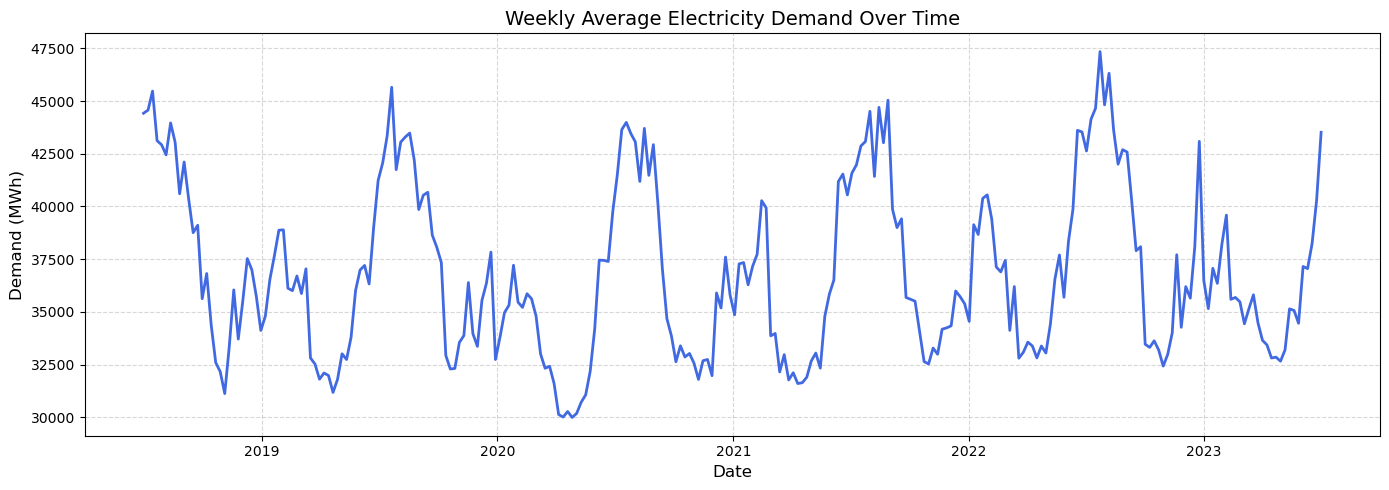

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date' to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# Set date as index for resampling
df.set_index('Date', inplace=True)

# Resample to weekly average for clarity
weekly_demand = df['Demand'].resample('W').mean()

# Plot
plt.figure(figsize=(14, 5))
plt.plot(weekly_demand.index, weekly_demand.values, color='royalblue', linewidth=2)
plt.title("Weekly Average Electricity Demand Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Demand (MWh)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Reset index if needed
df.reset_index(inplace=True)

In [4]:
df1 = df.copy()

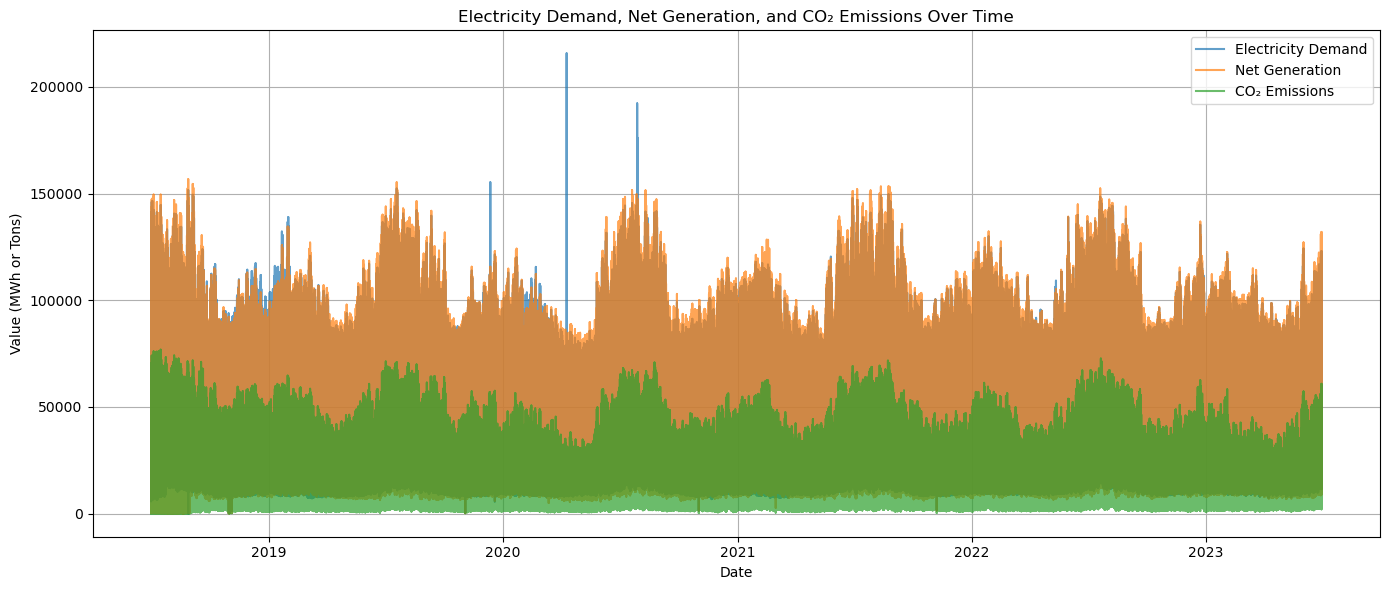

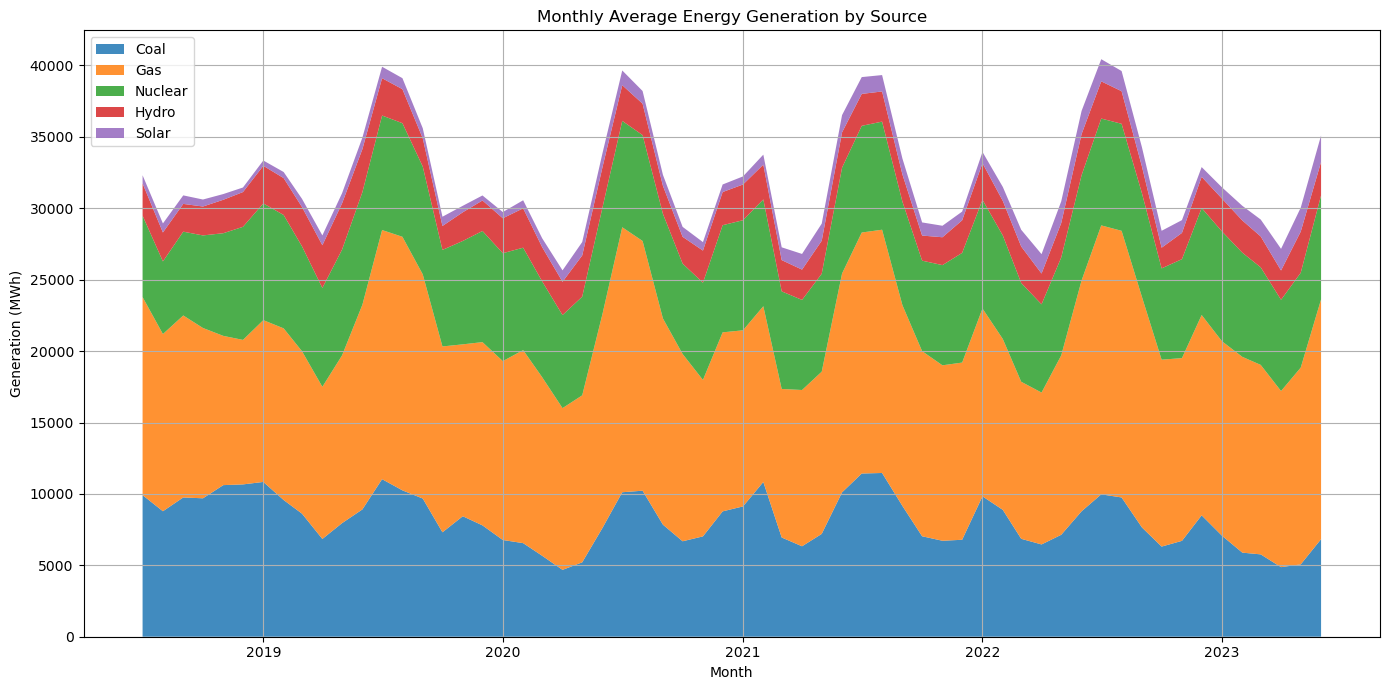

In [5]:
import matplotlib.pyplot as plt

# Ensure Date column is datetime and sorted
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')
df1.sort_values('Date', inplace=True)
df1.set_index('Date', inplace=True)

# ========== 1. Line Plot: Electricity Demand, Generation, Emissions ==========
plt.figure(figsize=(14, 6))
plt.plot(df1.index, df1['Demand'], label='Electricity Demand', alpha=0.7)
plt.plot(df1.index, df1['Net_Generation'], label='Net Generation', alpha=0.7)
plt.plot(df1.index, df1['CO2_Total_Emissions'], label='CO₂ Emissions', alpha=0.7)
plt.title('Electricity Demand, Net Generation, and CO₂ Emissions Over Time')
plt.xlabel('Date')
plt.ylabel('Value (MWh or Tons)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# ========== 3. Monthly Stacked Area Chart: Energy Mix ==========
df1['Month'] = df1.index.to_period('M')
monthly_mix = df1.groupby('Month')[['Coal_Gen', 'Gas_Gen', 'Nuclear_Gen', 'Hydro_Gen', 'Solar_Gen']].mean()
monthly_mix.index = monthly_mix.index.to_timestamp()

plt.figure(figsize=(14, 7))
plt.stackplot(monthly_mix.index,
              monthly_mix['Coal_Gen'],
              monthly_mix['Gas_Gen'],
              monthly_mix['Nuclear_Gen'],
              monthly_mix['Hydro_Gen'],
              monthly_mix['Solar_Gen'],
              labels=['Coal', 'Gas', 'Nuclear', 'Hydro', 'Solar'],
              alpha=0.85)
plt.title("Monthly Average Energy Generation by Source")
plt.xlabel("Month")
plt.ylabel("Generation (MWh)")
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

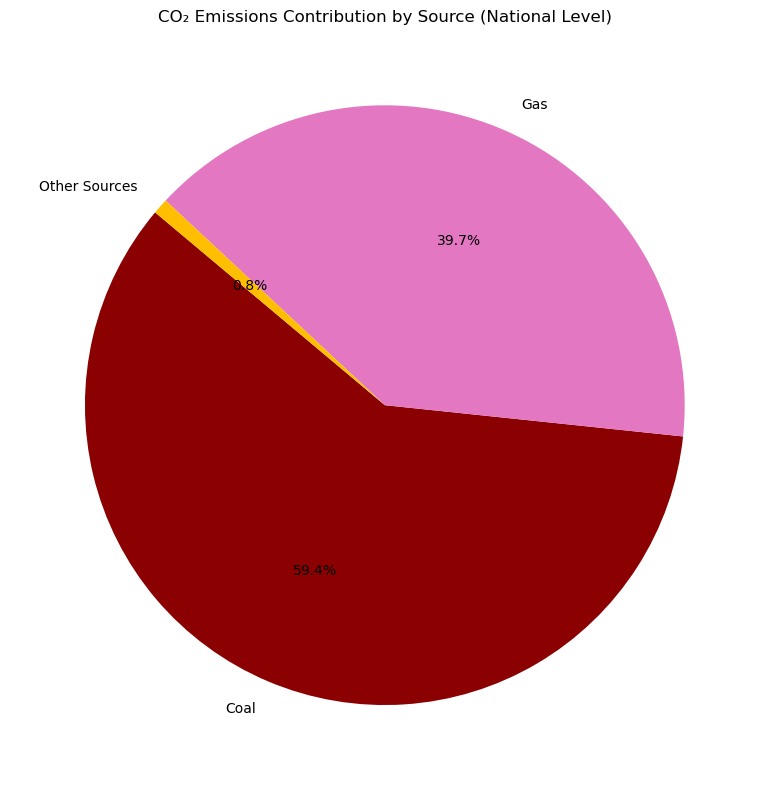

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
df['Date'] = pd.to_datetime(df['Date'])

# Aggregate total emissions from Coal and Gas for the entire dataset
total_emissions = {
    'Coal': df['CO2_Emissions_Coal'].sum(),
    'Gas': df['CO2_Emissions_Gas'].sum(),
    'Other Sources': df['CO2_Total_Emissions'].sum() - (df['CO2_Emissions_Coal'].sum() + df['CO2_Emissions_Gas'].sum())
}

# 🎨 Custom color palette
custom_colors = ['#8B0000', '#e377c2', '#ffbf00']  # Blue, Pink, Yellow

# Plotting as a Pie Chart with custom colors
plt.figure(figsize=(8, 8))
plt.pie(total_emissions.values(), 
        labels=total_emissions.keys(), 
        autopct='%1.1f%%', 
        startangle=140,
        colors=custom_colors)  # 👈 Custom colors applied here
plt.title('CO₂ Emissions Contribution by Source (National Level)')
plt.tight_layout()
plt.show()

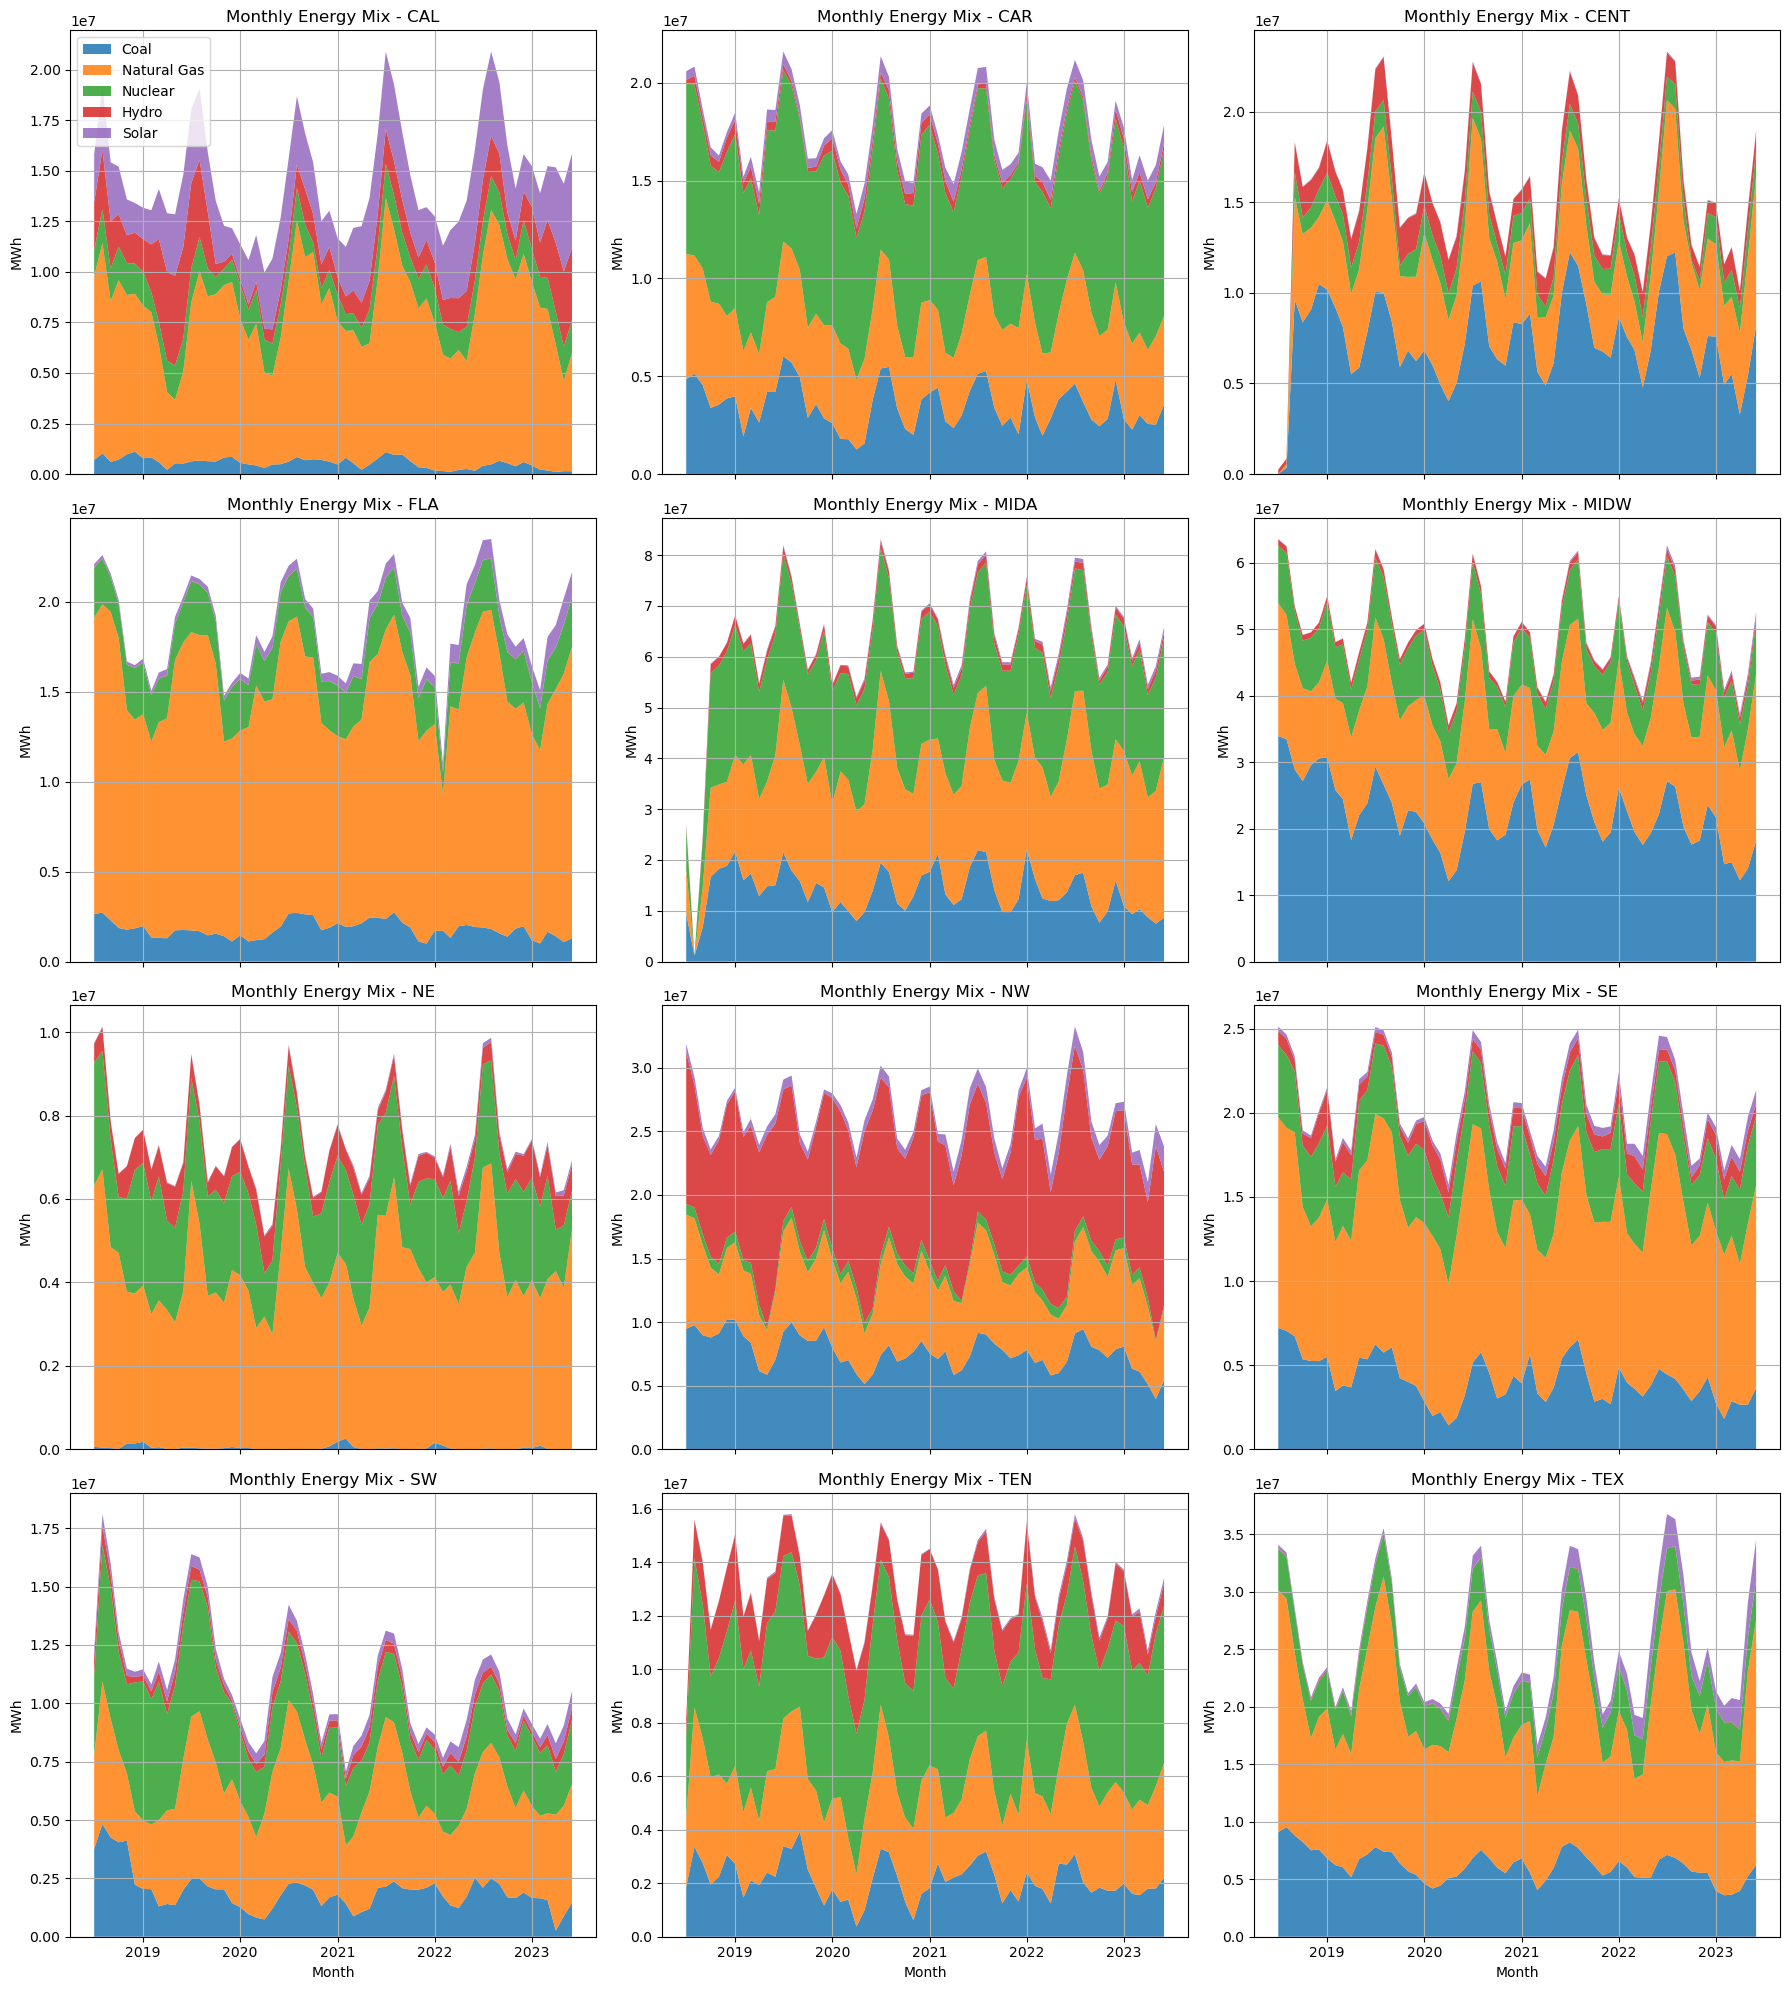

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Date' column is datetime and add 'Month' column
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df['Month'] = df['Date'].dt.to_period('M')

# Automatically get unique regions from your data
regions = df['Region'].unique()

# Energy source columns
energy_sources = ['Coal_Gen', 'Gas_Gen', 'Nuclear_Gen', 'Hydro_Gen', 'Solar_Gen']
energy_labels = ['Coal', 'Natural Gas', 'Nuclear', 'Hydro', 'Solar']

# Function to get monthly energy mix for a region
def get_monthly_mix(df, region):
    df_region = df[df['Region'] == region]
    monthly_mix = df_region.groupby('Month')[energy_sources].sum()
    monthly_mix.index = monthly_mix.index.to_timestamp()
    return monthly_mix

# Create subplots based on number of regions
n_regions = len(regions)
n_cols = 3
n_rows = -(-n_regions // n_cols)  # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows), sharex=True)
axes = axes.flatten()

# Plot for each region detected in the data
for i, region in enumerate(regions):
    mix = get_monthly_mix(df, region)
    
    axes[i].stackplot(
        mix.index,
        [mix[col] for col in energy_sources],
        labels=energy_labels,
        alpha=0.85
    )
    axes[i].set_title(f'Monthly Energy Mix - {region}')
    axes[i].set_ylabel("MWh")
    axes[i].grid(True)
    
    if i >= (n_rows - 1) * n_cols:
        axes[i].set_xlabel("Month")
    
    if i == 0:
        axes[i].legend(loc='upper left')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [8]:
# Map numeric DayOfWeek to day names
day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
           4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Replace numeric DayOfWeek with day names
df['DayOfWeek'] = df['DayOfWeek'].map(day_map)

C:\Users\rosem\AppData\Local\Temp\ipykernel_21220\4273171305.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='DayOfWeek', y='Demand', data=df,


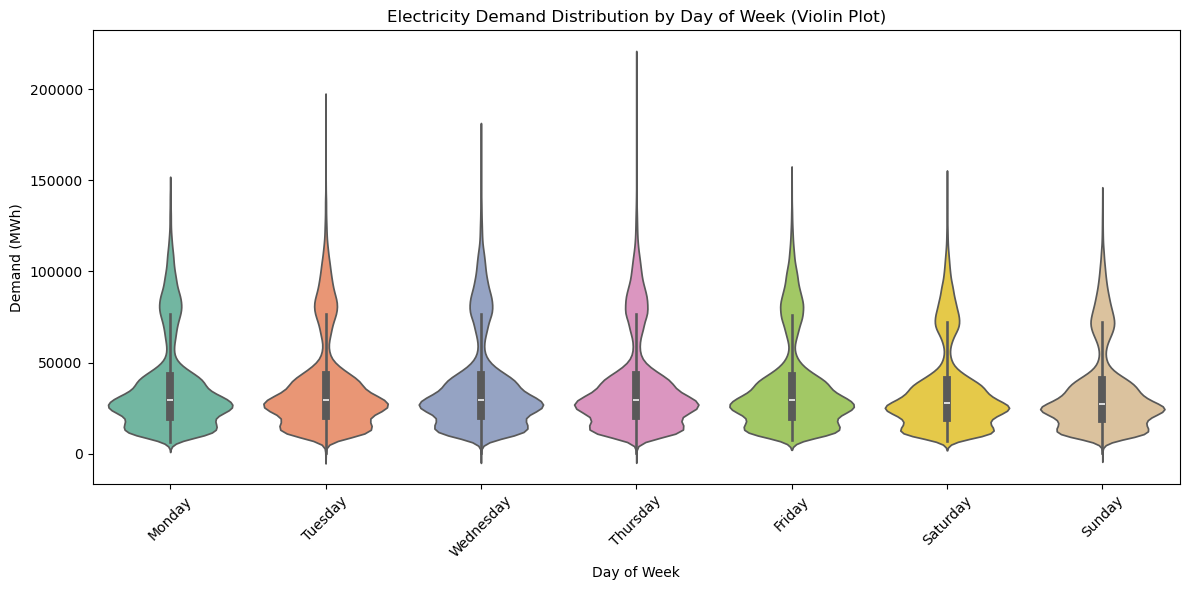

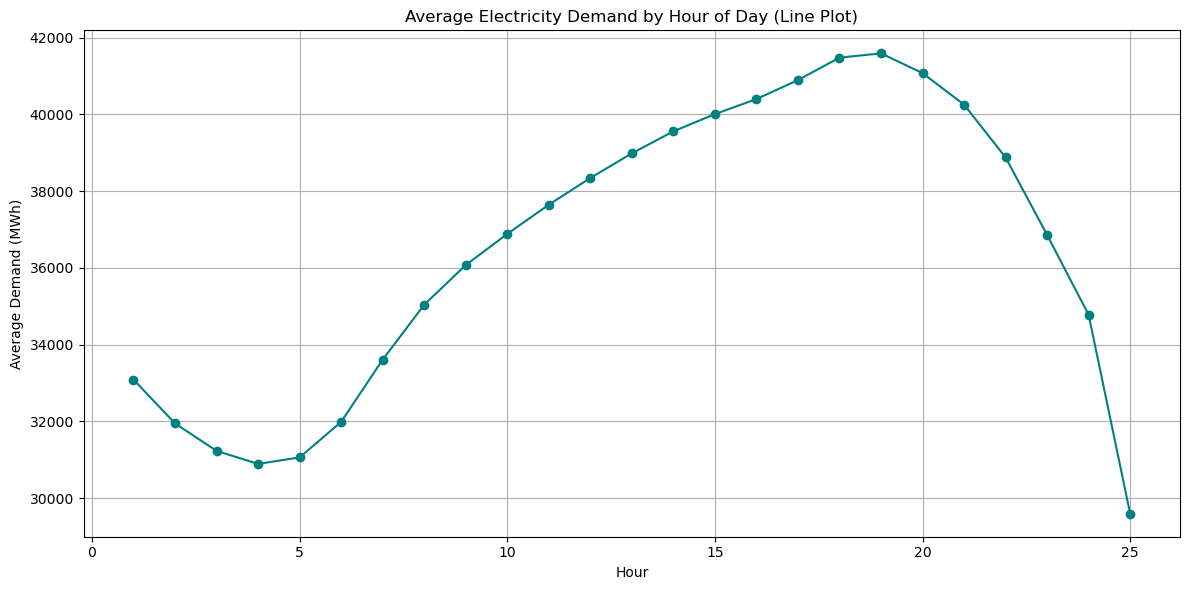

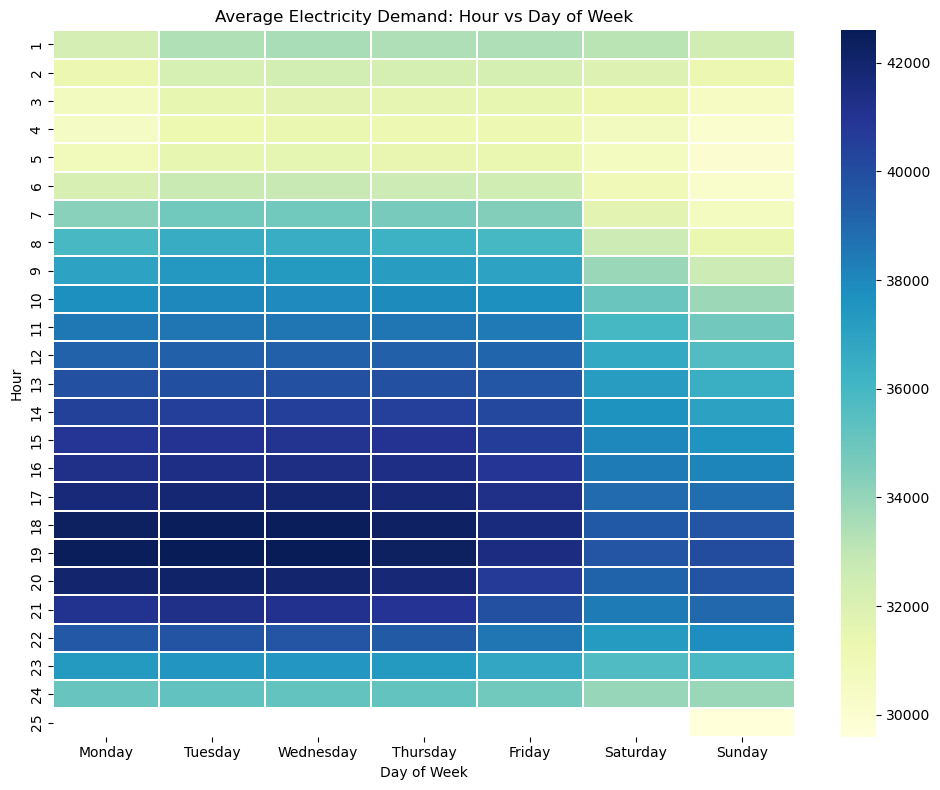

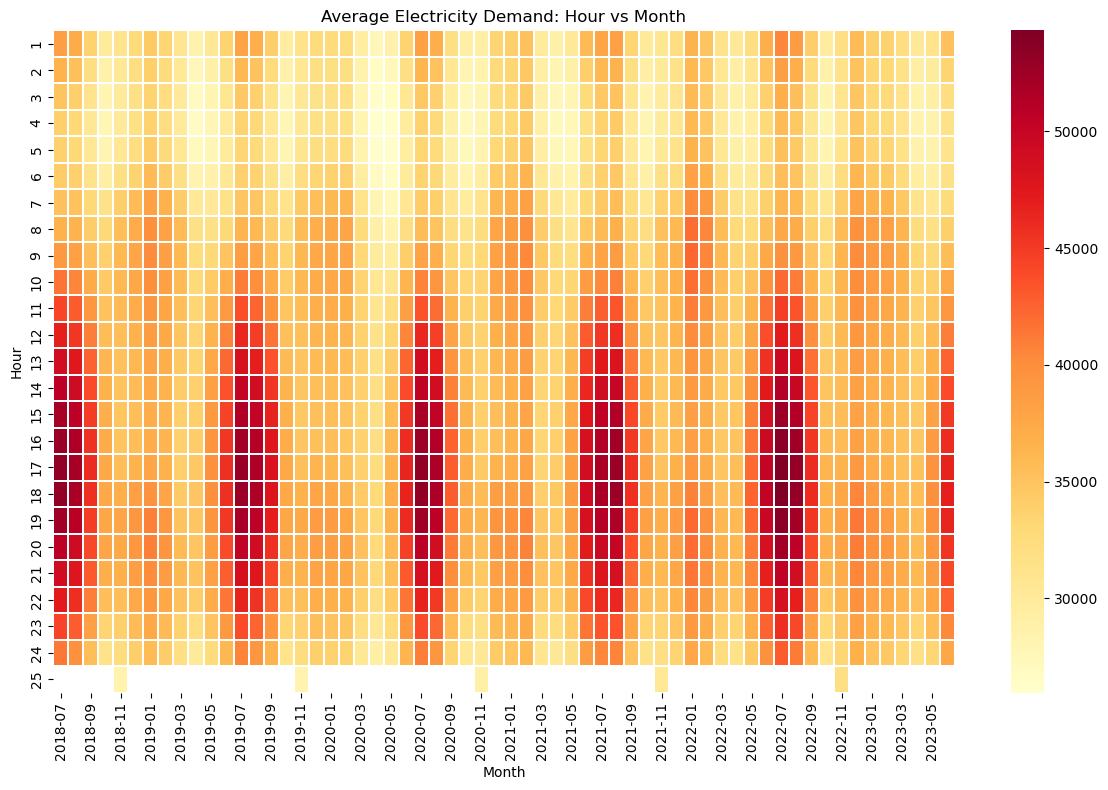

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your dataframe

# ----------------- Violin Plot: Demand by Day of Week -----------------
plt.figure(figsize=(12, 6))
sns.violinplot(x='DayOfWeek', y='Demand', data=df,
               order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
               inner='box', palette='Set2')
plt.title("Electricity Demand Distribution by Day of Week (Violin Plot)")
plt.xlabel("Day of Week")
plt.ylabel("Demand (MWh)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ----------------- Line Plot: Average Demand by Hour -----------------
avg_demand_by_hour = df.groupby('Hour')['Demand'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(avg_demand_by_hour['Hour'], avg_demand_by_hour['Demand'], marker='o', linestyle='-', color='teal')
plt.title("Average Electricity Demand by Hour of Day (Line Plot)")
plt.xlabel("Hour")
plt.ylabel("Average Demand (MWh)")
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------- Heatmap: Hour vs Day of Week -----------------
heatmap1 = df.pivot_table(index='Hour', columns='DayOfWeek', values='Demand', aggfunc='mean')
heatmap1 = heatmap1[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap1, cmap='YlGnBu', linewidths=0.3)
plt.title("Average Electricity Demand: Hour vs Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Hour")
plt.tight_layout()
plt.show()

# ----------------- Heatmap: Hour vs Month -----------------
heatmap2 = df.pivot_table(index='Hour', columns='Month', values='Demand', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap2, cmap='YlOrRd', linewidths=0.3)
plt.title("Average Electricity Demand: Hour vs Month")
plt.xlabel("Month")
plt.ylabel("Hour")
plt.tight_layout()
plt.show()

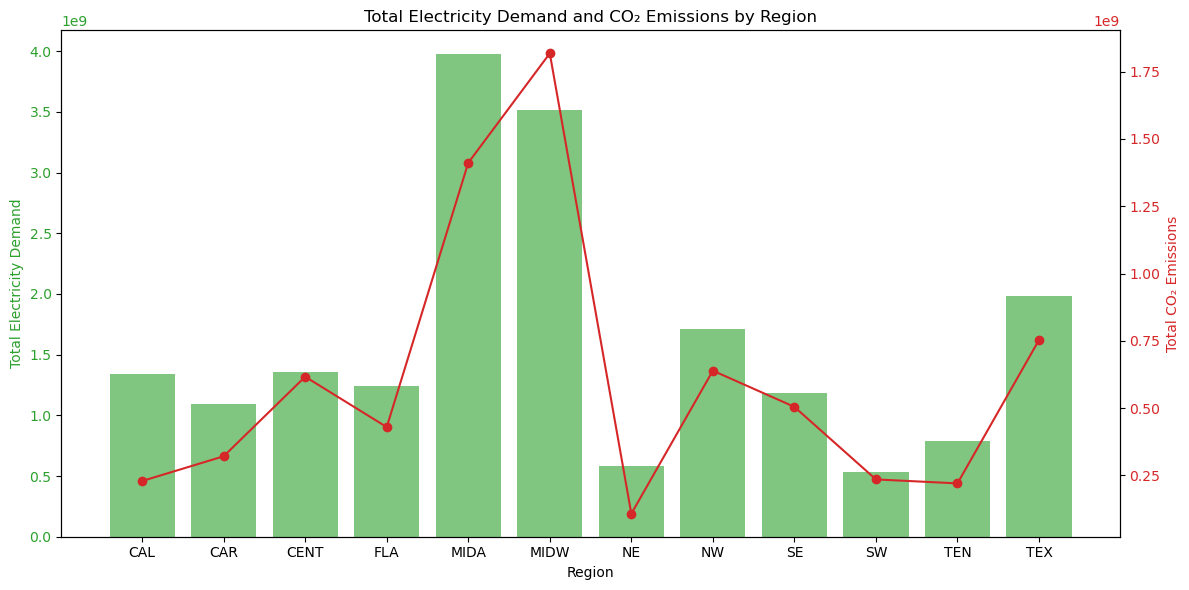

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
df['Date'] = pd.to_datetime(df['Date'])

# Group by Region
region_grouped = df.groupby('Region').agg({
    'Demand': 'sum',
    'CO2_Total_Emissions': 'sum'
}).reset_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Electricity Demand on left y-axis
color = 'tab:green'
ax1.set_xlabel('Region')
ax1.set_ylabel('Total Electricity Demand', color=color)
ax1.bar(region_grouped['Region'], region_grouped['Demand'], color=color, alpha=0.6, label='Demand')
ax1.tick_params(axis='y', labelcolor=color)

# Add CO₂ Emissions on right y-axis
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total CO₂ Emissions', color=color)
ax2.plot(region_grouped['Region'], region_grouped['CO2_Total_Emissions'], color=color, marker='o', label='CO₂ Emissions')
ax2.tick_params(axis='y', labelcolor=color)

# Titles and Grid
plt.title('Total Electricity Demand and CO₂ Emissions by Region')
fig.tight_layout()
plt.show()

In [11]:
df[df['Region'] == 'CAL']

,Date,UTC_Time,Region,Hour,Demand,Net_Generation,Total_Interchange,Forecasted_Demand,Coal_Gen,Gas_Gen,...,Season_Summer,Season_Winter,Demand_lag1,Demand_lag24,Demand_lag168,Rolling_Mean_3H,Rolling_Mean_24H,Total_Gen,Renewable_Pct,Fossil_Pct
0,2018-07-08,2018-07-08 08:00:00,CAL,1,30664.0,18659.0,-9218.0,29726.0,6.0,10566.0,...,1,0,33215.0,32597.0,26061.0,33371.000,34950.375,15326.0,16.188,68.981
1,2018-07-08,2018-07-08 09:00:00,CAL,2,28781.0,18056.0,-8915.0,27697.0,7.0,10191.0,...,1,0,30664.0,30415.0,24604.0,30886.667,34882.292,14780.0,15.629,68.999
2,2018-07-08,2018-07-08 10:00:00,CAL,3,27512.0,17258.0,-8298.0,26245.0,7.0,9494.0,...,1,0,28781.0,28749.0,23554.0,28985.667,34830.750,13753.0,14.397,69.083
3,2018-07-08,2018-07-08 11:00:00,CAL,4,26610.0,17143.0,-7994.0,25349.0,8.0,9264.0,...,1,0,27512.0,27605.0,22843.0,27634.333,34789.292,13580.0,14.971,68.277
4,2018-07-08,2018-07-08 12:00:00,CAL,5,25947.0,16779.0,-7648.0,24872.0,10.0,9272.0,...,1,0,26610.0,27026.0,22538.0,26689.667,34744.333,13729.0,15.813,67.609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43651,2023-06-30,2023-07-01 03:00:00,CAL,20,43820.0,38940.0,-3938.0,44273.0,212.0,20751.0,...,1,0,43399.0,39913.0,31537.0,43125.667,34867.375,32692.0,28.952,64.123
43652,2023-06-30,2023-07-01 04:00:00,CAL,21,43325.0,36125.0,-5647.0,42967.0,271.0,19852.0,...,1,0,43820.0,40042.0,32347.0,43514.667,35004.167,30086.0,25.587,66.885
43653,2023-06-30,2023-07-01 05:00:00,CAL,22,42226.0,33268.0,-7106.0,41585.0,195.0,18366.0,...,1,0,43325.0,39387.0,32714.0,43123.667,35122.458,28036.0,25.717,66.204
43654,2023-06-30,2023-07-01 06:00:00,CAL,23,40907.0,30500.0,-7266.0,38726.0,207.0,17208.0,...,1,0,42226.0,38189.0,32116.0,42152.667,35235.708,26125.0,24.678,66.660


In [12]:
df[df['Region'] == 'TEX']

,Date,UTC_Time,Region,Hour,Demand,Net_Generation,Total_Interchange,Forecasted_Demand,Coal_Gen,Gas_Gen,...,Season_Summer,Season_Winter,Demand_lag1,Demand_lag24,Demand_lag168,Rolling_Mean_3H,Rolling_Mean_24H,Total_Gen,Renewable_Pct,Fossil_Pct
481521,2018-07-02,2018-07-02 06:00:00,TEX,1,46784.0,46737.0,-45.0,35614.94,12538.0,19898.0,...,1,0,20179.2,17502.82,15726.07,29618.003,23537.782,37465.0,0.000,86.577
481522,2018-07-02,2018-07-02 07:00:00,TEX,2,44320.0,44244.0,-74.0,36177.82,12951.0,19214.0,...,1,0,46784.0,16756.89,15032.98,37094.400,24686.245,37195.0,0.000,86.477
481523,2018-07-02,2018-07-02 08:00:00,TEX,3,42514.0,42435.0,-80.0,36740.69,12915.0,19130.0,...,1,0,44320.0,16109.03,14495.94,44539.333,25786.452,37075.0,0.000,86.433
481524,2018-07-02,2018-07-02 09:00:00,TEX,4,41443.0,41219.0,-224.0,37303.57,12635.0,18832.0,...,1,0,42514.0,15890.98,14168.08,42759.000,26851.120,36497.0,0.000,86.218
481525,2018-07-02,2018-07-02 10:00:00,TEX,5,41056.0,40721.0,-331.0,37866.45,11934.0,18291.0,...,1,0,41443.0,15988.68,14026.23,41671.000,27895.592,35255.0,0.000,85.733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525292,2023-06-30,2023-07-01 01:00:00,TEX,20,73862.0,73920.0,58.0,75075.00,11013.0,36589.0,...,1,0,76384.0,77220.00,70515.00,75998.333,65194.000,54596.0,4.308,87.190
525293,2023-06-30,2023-07-01 02:00:00,TEX,21,70570.0,70337.0,-232.0,71706.00,10632.0,36722.0,...,1,0,73862.0,73984.00,67340.00,73605.333,65051.750,52394.0,0.758,90.381
525294,2023-06-30,2023-07-01 03:00:00,TEX,22,67978.0,67953.0,-25.0,69197.00,10592.0,35912.0,...,1,0,70570.0,71456.00,65072.00,70803.333,64906.833,51223.0,0.148,90.787
525295,2023-06-30,2023-07-01 04:00:00,TEX,23,64727.0,64768.0,42.0,65551.00,10055.0,32700.0,...,1,0,67978.0,67461.00,61758.00,67758.333,64792.917,47410.0,0.021,90.181


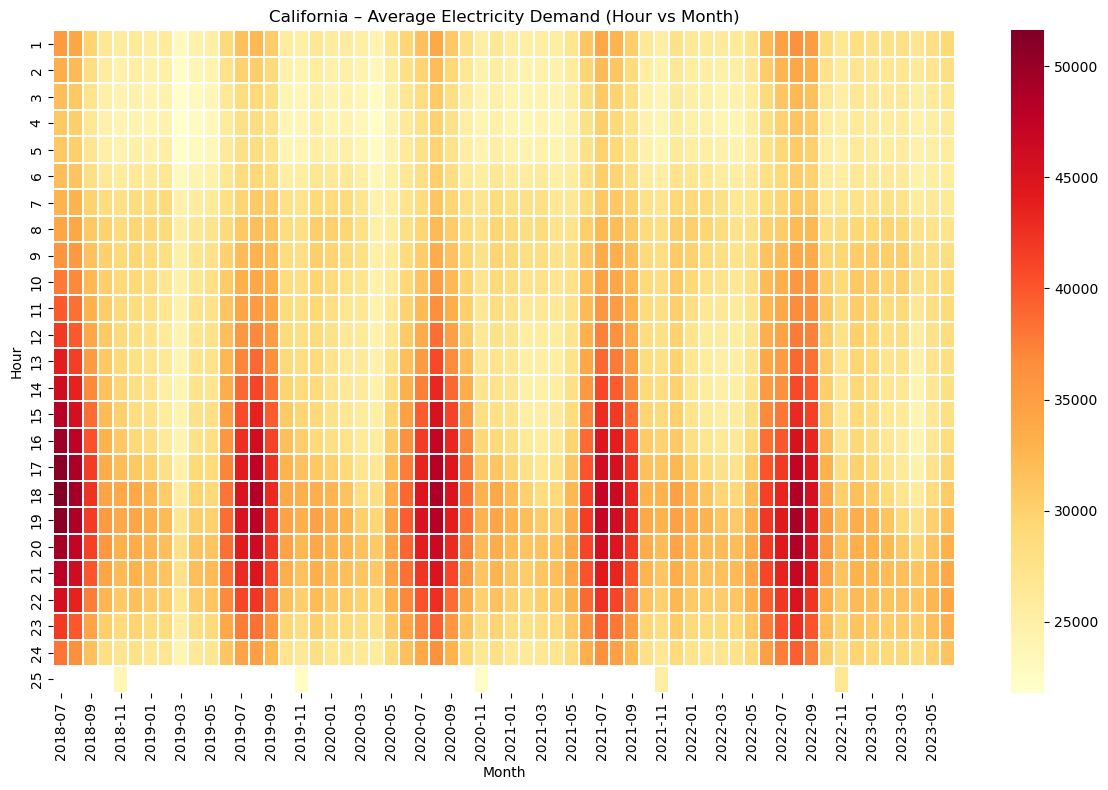

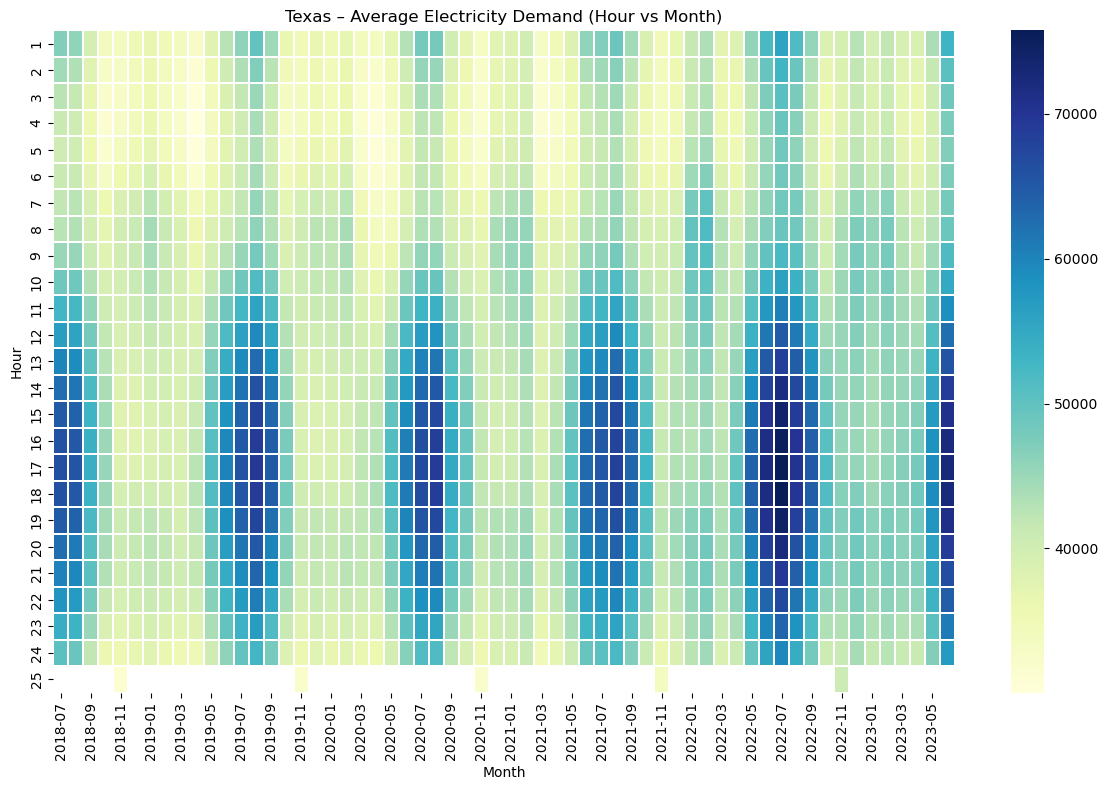

In [13]:


# ------------------- California Demand Heatmap -------------------
california_data = df[df['Region'] == 'CAL']

heatmap_cal = california_data.pivot_table(
    index='Hour',
    columns='Month',
    values='Demand',
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_cal, cmap='YlOrRd', linewidths=0.3)
plt.title("California – Average Electricity Demand (Hour vs Month)")
plt.xlabel("Month")
plt.ylabel("Hour")
plt.tight_layout()
plt.show()

# ------------------- Texas Demand Heatmap -------------------
texas_data = df[df['Region'] == 'TEX']

heatmap_tex = texas_data.pivot_table(
    index='Hour',
    columns='Month',
    values='Demand',
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_tex, cmap='YlGnBu', linewidths=0.3)
plt.title("Texas – Average Electricity Demand (Hour vs Month)")
plt.xlabel("Month")
plt.ylabel("Hour")
plt.tight_layout()
plt.show()


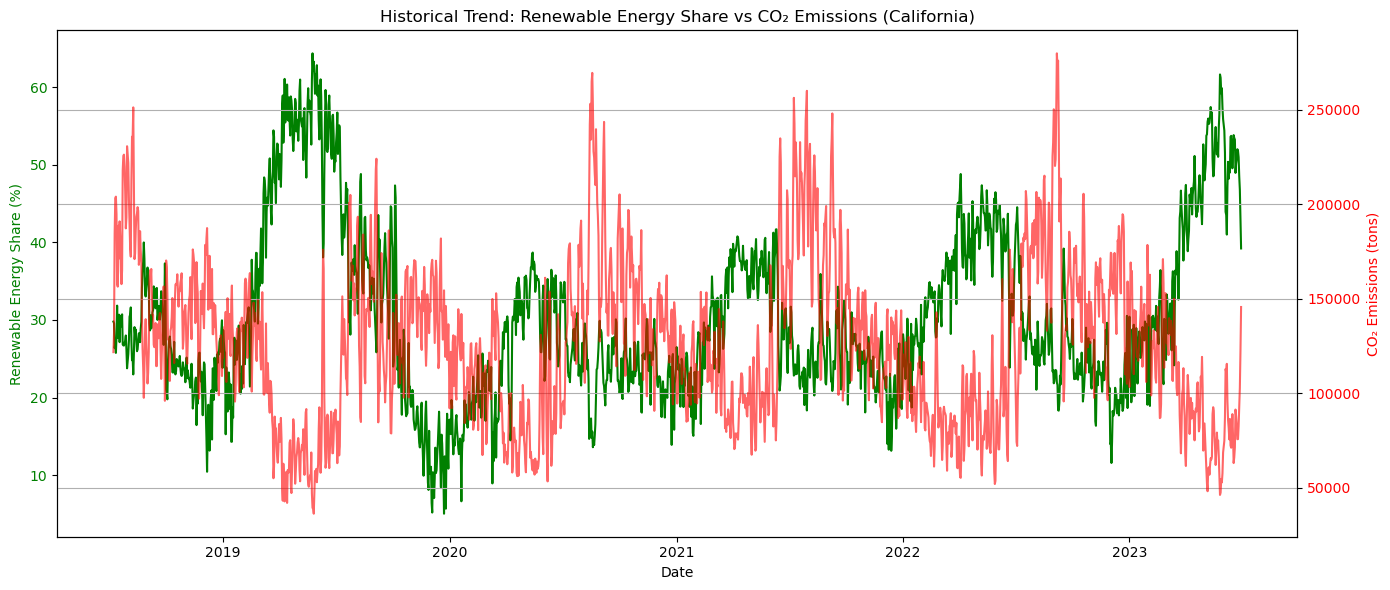

In [14]:
import matplotlib.pyplot as plt

# Filter for a specific region (e.g., California)
region_df = df[df['Region'] == 'CAL'].copy()
region_df['Date'] = pd.to_datetime(region_df['Date'])

# Aggregate by day
daily_trend = region_df.groupby('Date').agg({
    'Renewable_Pct': 'mean',
    'CO2_Total_Emissions': 'sum'
}).reset_index()

# Plot
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot Renewable %
ax1.set_title("Historical Trend: Renewable Energy Share vs CO₂ Emissions (California)")
ax1.plot(daily_trend['Date'], daily_trend['Renewable_Pct'], color='green', label='Renewable Energy Share (%)')
ax1.set_xlabel("Date")
ax1.set_ylabel("Renewable Energy Share (%)", color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Plot CO₂ Emissions on secondary axis
ax2 = ax1.twinx()
ax2.plot(daily_trend['Date'], daily_trend['CO2_Total_Emissions'], color='red', alpha=0.6, label='CO₂ Emissions (tons)')
ax2.set_ylabel("CO₂ Emissions (tons)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Grid and layout
plt.grid(True)
plt.tight_layout()
plt.show()


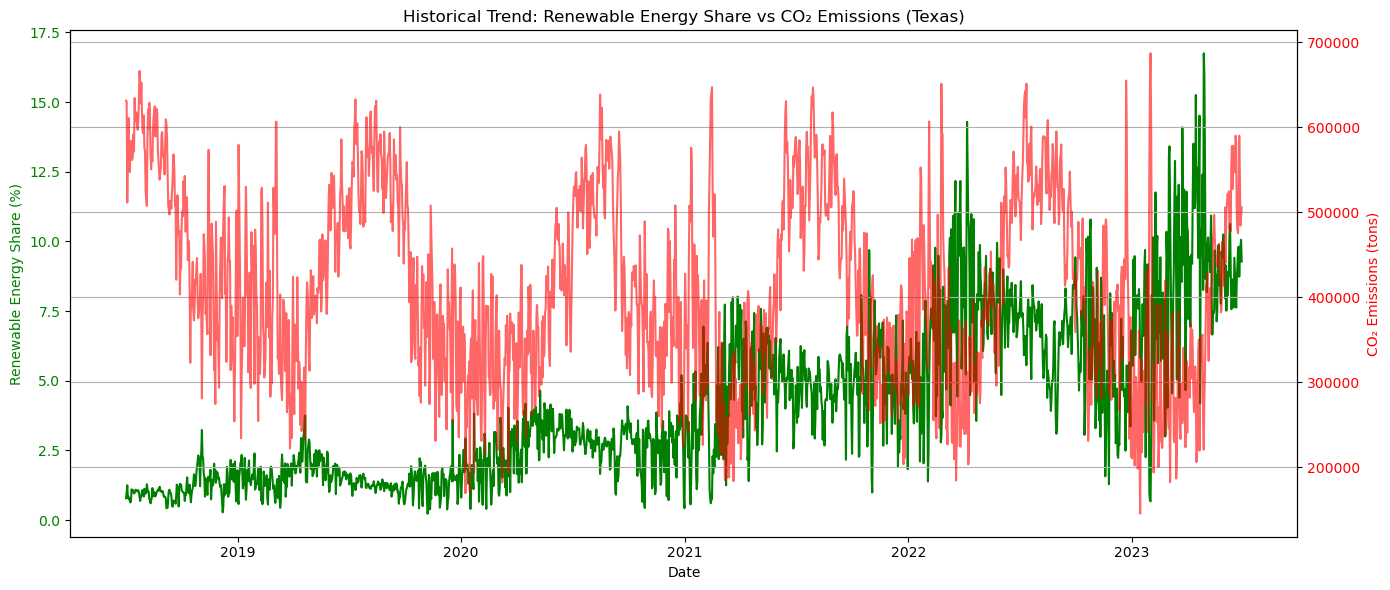

In [15]:
import matplotlib.pyplot as plt

# Filter for a specific region (e.g., California)
region_df = df[df['Region'] == 'TEX'].copy()
region_df['Date'] = pd.to_datetime(region_df['Date'])

# Aggregate by day
daily_trend = region_df.groupby('Date').agg({
    'Renewable_Pct': 'mean',
    'CO2_Total_Emissions': 'sum'
}).reset_index()

# Plot
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot Renewable %
ax1.set_title("Historical Trend: Renewable Energy Share vs CO₂ Emissions (Texas)")
ax1.plot(daily_trend['Date'], daily_trend['Renewable_Pct'], color='green', label='Renewable Energy Share (%)')
ax1.set_xlabel("Date")
ax1.set_ylabel("Renewable Energy Share (%)", color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Plot CO₂ Emissions on secondary axis
ax2 = ax1.twinx()
ax2.plot(daily_trend['Date'], daily_trend['CO2_Total_Emissions'], color='red', alpha=0.6, label='CO₂ Emissions (tons)')
ax2.set_ylabel("CO₂ Emissions (tons)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Grid and layout
plt.grid(True)
plt.tight_layout()
plt.show()
